In [38]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [39]:
df = pd.read_csv('test_scores.csv')
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [40]:
df = df.drop(columns = ["school", "classroom", "student_id"])
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [41]:
df["percent_change"] = ((df['posttest'] - df['pretest']) / df['posttest']) * 100
df.head(10)

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,percent_change
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,13.888889
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,16.455696
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,20.779221
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474
5,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,74.0,10.810811
6,Urban,Non-public,Standard,20.0,Male,Does not qualify,63.0,75.0,16.000000
7,Urban,Non-public,Standard,20.0,Female,Does not qualify,63.0,72.0,12.500000
8,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,77.0,16.883117
9,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,72.0,15.277778


In [42]:
# add a blank column
df["High_Low_Growth"] = ''
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,percent_change,High_Low_Growth
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,13.888889,
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,16.455696,
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,20.779221,
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,


In [43]:
# apply a cut-off on percent change
def growth_rating(x):
    if x >= 18.5:
        result = "High Growth"
    else:
        result = "Low Growth"
    return result


df['High_Low_Growth'] = df['percent_change'].apply(growth_rating)
df.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest,percent_change,High_Low_Growth
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0,13.888889,Low Growth
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0,16.455696,Low Growth
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,Low Growth
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0,20.779221,High Growth
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0,15.789474,Low Growth


In [44]:
df.count()

school_setting     2133
school_type        2133
teaching_method    2133
n_student          2133
gender             2133
lunch              2133
pretest            2133
posttest           2133
percent_change     2133
High_Low_Growth    2133
dtype: int64

In [45]:
df['High_Low_Growth'].value_counts()

Low Growth     1128
High Growth    1005
Name: High_Low_Growth, dtype: int64

In [46]:
X = df.drop(columns = ["High_Low_Growth", "percent_change", "posttest", "pretest"])
X = pd.get_dummies(X)

X.head()

,n_student,school_setting_Rural,school_setting_Suburban,school_setting_Urban,school_type_Non-public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does not qualify,lunch_Qualifies for reduced/free lunch
0,20.0,0,0,1,1,0,0,1,1,0,1,0
1,20.0,0,0,1,1,0,0,1,1,0,1,0
2,20.0,0,0,1,1,0,0,1,0,1,1,0
3,20.0,0,0,1,1,0,0,1,1,0,1,0
4,20.0,0,0,1,1,0,0,1,0,1,1,0


In [47]:
y = df.loc[:, "High_Low_Growth"].copy()

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1 
                                                    )

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Resample the training data with the BalancedRandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1) 

# fit the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# make prediction
predictions = rf_model.predict(X_test_scaled)

In [50]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, predictions)

0.7380343082114735

In [51]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual High_Growth", "Actual Low_Growth"], columns=["Predicted High_Growth", "Predicted Low_Growth"])

cm_df

,Predicted High_Growth,Predicted Low_Growth
Actual High_Growth,169,85
Actual Low_Growth,53,227


In [52]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

High Growth       0.76      0.67      0.81      0.71      0.73      0.53       254
 Low Growth       0.73      0.81      0.67      0.77      0.73      0.55       280

avg / total       0.74      0.74      0.73      0.74      0.73      0.54       534



In [53]:
# List the features sorted in descending order by feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3612482841628457, 'n_student'),
 (0.15865452634885038, 'teaching_method_Standard'),
 (0.12362713142566739, 'teaching_method_Experimental'),
 (0.09620270760409341, 'lunch_Qualifies for reduced/free lunch'),
 (0.08556365920300184, 'lunch_Does not qualify'),
 (0.04189407409258582, 'school_setting_Suburban'),
 (0.02787658496287215, 'school_setting_Urban'),
 (0.02608846192019951, 'school_setting_Rural'),
 (0.021777822783547295, 'school_type_Non-public'),
 (0.020136094747501047, 'gender_Male'),
 (0.019123536889103575, 'gender_Female'),
 (0.017807115859731736, 'school_type_Public')]

In [60]:
df['n_student'].unique()


array([20., 21., 18., 15., 16., 19., 17., 28., 27., 24., 14., 22., 23.,
       31., 25., 26., 29., 30.])

<AxesSubplot:ylabel='gender'>

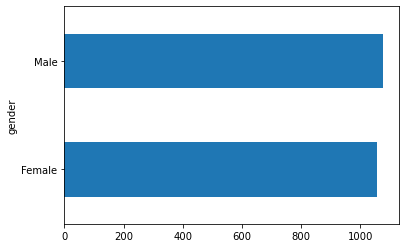

In [23]:
import matplotlib.pyplot as plt

gender = df.groupby('gender')['gender'].count()

gender.plot.barh()

<AxesSubplot:ylabel='teaching_method'>

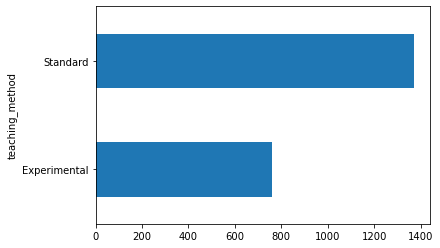

In [24]:
teaching_method = df.groupby('teaching_method')['teaching_method'].count()

teaching_method.plot.barh()

<AxesSubplot:ylabel='school_setting'>

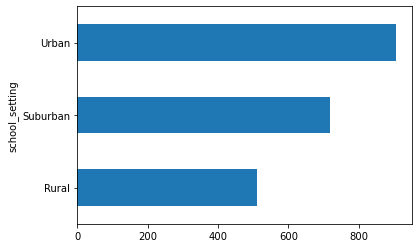

In [25]:
school_setting = df.groupby('school_setting')['school_setting'].count()
school_setting.plot.barh()

In [27]:
original_df = pd.read_csv('test_scores.csv')
original_df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [34]:
student_info_df = original_df[['student_id','school','gender','lunch','pretest','posttest']]
student_info_df.head()

,student_id,school,gender,lunch,pretest,posttest
0,2FHT3,ANKYI,Female,Does not qualify,62.0,72.0
1,3JIVH,ANKYI,Female,Does not qualify,66.0,79.0
2,3XOWE,ANKYI,Male,Does not qualify,64.0,76.0
3,556O0,ANKYI,Female,Does not qualify,61.0,77.0
4,74LOE,ANKYI,Male,Does not qualify,64.0,76.0


In [55]:
school_info_df = original_df[['school','student_id','school_setting','school_type','classroom','teaching_method','n_student']]
school_info_df.head()

,school,student_id,school_setting,school_type,classroom,teaching_method,n_student
0,ANKYI,2FHT3,Urban,Non-public,6OL,Standard,20.0
1,ANKYI,3JIVH,Urban,Non-public,6OL,Standard,20.0
2,ANKYI,3XOWE,Urban,Non-public,6OL,Standard,20.0
3,ANKYI,556O0,Urban,Non-public,6OL,Standard,20.0
4,ANKYI,74LOE,Urban,Non-public,6OL,Standard,20.0


In [56]:
student_info_df.to_csv("student_info.csv", index = None)
school_info_df.to_csv("school_info.csv", index = None)